# Convolutional Layers
Before we being, I made this notebook and took notes from https://towardsdatascience.com/the-math-behind-convolutional-neural-networks-6aed775df076/#37ff 
Now, 
# The Convolution Operation

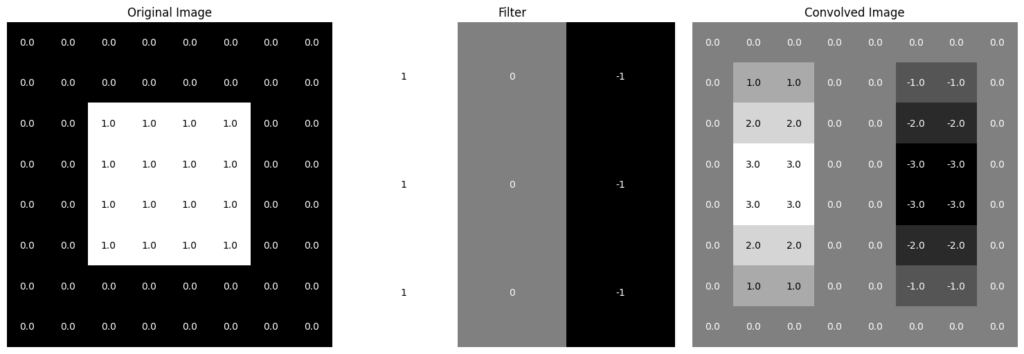


The convolution operation involves a sliding a filter (or kernel) over the input image and computing the dot product of filter values and the original pixel values at each position. Typically, we create a small matrix of weights, typically of size 3x3 or 5x5. Lets go over why we'd use these two sizes.

For example, a signle 7x7 filter has 49 paramters. Three stacked 3x3 filters covers a 7x7 **receptive** field - but only uses 27 paramters total (3x9). We typically want less paramters total for a lower risk of overfitting. 

Secondly, if we stack many small filters we introduce more nonlinearity as these filters must go through their respective activation functions (ReLU) - meaning the network learns *more complex* transformations than one big linear filter.


| Advantage | Explanation | 
|----------------------|-----------| 
| Fewer Parameters → Lower Overfitting Risk | A single 7×7 filter has 49 weights, while stacking three 3×3 filters reaches the same receptive field (7×7) using only 27 weights. Fewer parameters make the model more efficient and less prone to overfitting.  |
| More Nonlinearity → More Expressive Power | Each small filter is followed by an activation like ReLU, so three stacked 3×3 filters apply ReLU three times. A single 7×7 filter only gets one ReLU. More nonlinear layers = richer feature transformations. |
| Builds Features Hierarchically (Like Human Perception) | Small filters force the network to learn simple patterns first (edges), then combine them into textures, and later into shapes or objects. Large filters try to learn everything at once and lose this structured abstraction. |




Mathmatically, the convolution operation can be expressed as: 
$$
S(i,j) = (I * K)(i,j) = \sum_m \sum_n I(i+m, j+n) \cdot K(m,n)
$$
* Where S(i, j) is the output feature map.
* I is the input image.
* K is the kernel or filter
* i, j are the coordinates on the feature map
* m, n are the coordinates in the kernel. 
* (*) denotes the convolution operation. 

In english, this equation tells us that each element S(i, j) of the output feature map is the sum of element wise product of the kernel K and the portion of the input image I over which the kernel is currently positioned. 
In other words we think of I our grid of pixel values, while K is the small filter like a 3x3 grid with numbers in it. Finally, we'd have S as our output image. 
At every position (i, j) in the output S:
1. Place the kernel K on top of the input image I, aligning its top-left corner position to (i, j). 
2. Multiply each value of the kernel with the pixel directly underneat it. 
    * e.g., $K (0, 0) \times I(i, j)$
    * $K(0, 1) \times I(i, j + 1)$
    * $K(1, 0) \times I(i + 1, j)$, etc. 
3. Add up all those products, our total becomes S(i, j)

Typically, the values inside the kernel are the weights learned during training, but   
Suppose the kernel is $ K = 
\begin{bmatrix}
 1 & 0 & -1 \\
 1 & 0 & -1 \\
 1 & 0 & -1 
 \end{bmatrix}
 $ And you slide over region I, I region under kernel 
 $ =
\begin{bmatrix}
10 & 20 & 30 \\
15 & 25 & 35 \\
20 & 30 & 40 
\end{bmatrix}
 $
 Then, 
 $$
 S(i, j) = 
(1 \cdot 10) + (0 \cdot 20) + (-1 \cdot 30) \\
+ (1 \cdot 15) + (0 \cdot 25) + (-1 \cdot 35) \\
+ (1 \cdot 20) + (0 \cdot 30) + (-1 \cdot 40) \\
 S(i, j) = -60
 $$

We'd end up multiplying each kernel cell by its corresponding image pixel, then sum all of them. 
Once the full S is built, that feature map represents how strongly the kernel **matched** different parts of the image. 
| Type of Kernel | Meaning of High Output Values in S | 
-------------------|----------------------------------
| Edge detector | Bright areas in S = strong vertical edges in input |
| Blur kernel | smooths the image |
| Sharpen kernel | Amplifies contours |
| CNN Learned kernel | Detects whatever pattern it evolved to detect |




# Stride


![My GIF](JupyterNotebookVisuals\1OlE3bnC0WaYt3wW1dlcMdA.gif)


A stride specifies the number of pixels we'll move a filter across the input image or feature map in each step. The stride is applied both horizontally and vertically. If we had a stride of 1, then we'd move one pixel at a time (our anchor point). When we have larger strides, the filter will skip pixels and leading to less dense convergance. Typically, we denote the top left part of the filter as our **anchor** and reference the movement of the top left coordinate onto the rest of the cells. 
* **With a Stride of 1**: The filter moves across every pixel, with a resulting output feature map that is relatively large or similar in size to the input.
* **With a Stride greater than 1**: Our filter will skip over pixels which means we cover the input in few steps. The result is a smaller output feature map as each step covers a larger area of the inptu with less overlap between positions where the feature is applied. 
Suppose input is 
  $ I = 
\begin{bmatrix}
 A & B & C & D & E \\
 F & G & H & I & J \\
 K & L & M & N & O \\
 P & Q & R & S & T \\
 U & V & W & X & Y 
 \end{bmatrix}
$ 
    
Our 3x3 filter first covers $ 
\begin{bmatrix}
 A & B & C \\
 F & G & H \\
 K & L & M  
 \end{bmatrix}
$
If stride = 1, then $
\begin{bmatrix}
 B & C & D \\
 G & H & I \\
 L & M & N 
 \end{bmatrix}
$
If stride = 2, then $
\begin{bmatrix}
 C & D & E \\
 H & I & J \\
 M & N & O 
 \end{bmatrix}
$
* When our stride is larger, we have less overlap, and we'll end up with a smaller output. 

**Mathmatical Representation**: We can calculate the size of the ouptut feature map (_Wout, _Hout) from the input size (_Win, _Hin), filter size (F), stride (S), and padding (P) using the formula. 

$$
W_{out} = \frac{W_{in} - F + 2P}{S} + 1
$$
$$
H_{out} = \frac{H_{in} - F + 2P}{S} + 1
$$
where:
* _Wout and _Hout are the width and height of the ouptut feature map respectively. 
* _Win and _Hin are the width and height of the input respectively. 
* F is the size of the filter.
* S is the stride. 
* P is the padding. 

Ex:
Input = 5x5 image
Filer = 3x3
Stride = 1
Padding = 0
$$
W_{out} = \frac{5 - 3 + 2(0)}{1} + 1 = 3
$$
$$
H_{out} = \frac{5 - 3 + 2(0)}{1} + 1 = 3
$$
With the example shown, our output becomes 3x3 where we **lost** the border information. To visualize the problem we need to solve, pay attention to the top left pixel and notice how we only capture the information in the pixel once.

<img src="JupyterNotebookVisuals\6x6matrix-1.png" width="300">
<img src="JupyterNotebookVisuals\6x6matrix-2.png" width="300">
<img src="JupyterNotebookVisuals\6x6matrix-3.png" width="300">

Notice how in the shaded pixel we only capture the edge pixel information once. 
  
<img src="JupyterNotebookVisuals\6x6matrix-4.png" width="300">

The pixels that are towards the middle may be captured up to nine times compared to our edge pixel at position (0,0)! 

# Padding

![My GIF](JupyterNotebookVisuals/1VwOf7sD87Yw9P1215NngRQ.gif)


In the example above, the orginal image which was a 8x8 matrix has been increased to a 10x10 matrix with a padding of one. We have now added:
* 1 extra row on top
* 1 extra row on bottom
* 1 extra row on left
* 1 extra row on right

Without padding, every time we perform the convolution operation we'd lose spatial information about the original image. With padding, we can apply filters without shrinking the spatial dimensions. Additionally, the filters are then able to process the edge pixels of the image. Thus, the edge pixels (such as all pixels in the first row or column, and all pixels in the last row or column) are captured and used in the networks learning process. 

<img src="JupyterNotebookVisuals\outputmatrix.png" width="800">